# Assignment 3: Non-Linear Models and Validation Metrics (37 total marks)
### Due: October 24 at 11:59pm

### Name: 

### In this assignment, you will need to write code that uses non-linear models to perform classification and regression tasks. You will also be asked to describe the process by which you came up with the code. More details can be found below. Please cite any websites or AI tools that you used to help you with this assignment.

### Import Libraries

In [114]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

## Part 1: Regression (14.5 marks)

For this section, we will be continuing with the concrete example from yellowbrick. You will need to compare these results to the results from the previous assignment. Please use the results from the solution if you were unable to complete Assignment 2

### Step 1: Data Input (0.5 marks)

The data used for this task can be downloaded using the yellowbrick library: 
https://www.scikit-yb.org/en/latest/api/datasets/concrete.html

Use the yellowbrick function `load_concrete()` to load the concrete dataset into the feature matrix `X` and target vector `y`.

In [115]:
# TO DO: Import concrete dataset from yellowbrick library
from yellowbrick.datasets import load_concrete
X, y = load_concrete()


### Step 2: Data Processing (0 marks)

Data processing was completed in the previous assignment. No need to repeat here.

### Step 3: Implement Machine Learning Model

1. Import the Decision Tree, Random Forest and Gradient Boosting Machines regression models from sklearn
2. Instantiate the three models with `max_depth = 5`. Are there any other parameters that you will need to set?
3. Implement each machine learning model with `X` and `y`

### Step 4: Validate Model

Calculate the average training and validation accuracy using mean squared error with cross-validation. To do this, you will need to set `scoring='neg_mean_squared_error'` in your `cross_validate` function and negate the results (multiply by -1)

### Step 5: Visualize Results (4 marks)

1. Create a pandas DataFrame `results` with columns: Training accuracy and Validation accuracy, and index: DT, RF and GB
2. Add the accuracy results to the `results` DataFrame
3. Print `results`

In [121]:
# TO DO: ADD YOUR CODE HERE FOR STEPS 3-5
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor
from sklearn.ensemble import GradientBoostingRegressor
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=0)
# Create a Decision Tree model
decision_tree = DecisionTreeRegressor(random_state=0, max_depth = 5)
decision_tree.fit(X_train, y_train)
random_forest = RandomForestRegressor(random_state=0, max_depth =5)
gradient_boost = GradientBoostingRegressor(random_state =0, max_depth =5)
random_forest.fit(X_train, y_train)
gradient_boost.fit(X_train, y_train)
results = pd.DataFrame(index =["DT", "RF", "GB"], columns = ["Training Acc", "Validation Acc"])
results.loc["DT"] = cross_val_score(decision_tree, X_train, y_train, cv=5, scoring = "neg_mean_squared_error").mean()*-1, 
cross_val_score(decision_tree, X_test, y_test, cv=5, scoring = "neg_mean_squared_error").mean()*-1
results.loc["RF"] = cross_val_score(random_forest, X_train, y_train, cv=5, scoring = "neg_mean_squared_error").mean()*-1 , 
cross_val_score(random_forest, X_test, y_test, cv=5, scoring = "neg_mean_squared_error").mean()*-1
results.loc["GB"] = cross_val_score(gradient_boost, X_train, y_train, cv=5, scoring = "neg_mean_squared_error").mean()*-1 , 
cross_val_score(gradient_boost, X_test, y_test, cv=5, scoring = "neg_mean_squared_error").mean()*-1
results
# Note: for any random state parameters, you can use random_state = 0
# HINT: USING A LOOP TO STORE THE DATA IN YOUR RESULTS DATAFRAME WILL BE MORE EFFICIENT

,Training Acc,Validation Acc
DT,74.045335,74.045335
RF,47.614708,47.614708
GB,23.5465,23.5465


Repeat the step above to print the R2 score instead of the mean-squared error. For this case, you can use `scoring='r2'`

In [32]:
# TO DO: ADD YOUR CODE HERE
results.loc["DT"] = cross_val_score(decision_tree, X_train, y_train, cv=5, scoring = "r2").mean(), 
cross_val_score(decision_tree, X_test, y_test, cv=5, scoring = "r2").mean()
results.loc["RF"] = cross_val_score(random_forest, X_train, y_train, cv=5, scoring = "r2").mean() , 
cross_val_score(random_forest, X_test, y_test, cv=5, scoring = "r2").mean()
results.loc["GB"] = cross_val_score(gradient_boost, X_train, y_train, cv=5, scoring = "r2").mean() , 
cross_val_score(gradient_boost, X_test, y_test, cv=5, scoring = "r2").mean()
results

,Training accuracy,Validation accuracy
DT,0.735184,0.735184
RF,0.830004,0.830004
GB,0.916155,0.916155


### Questions (6 marks)
1. How do these results compare to the results using a linear model in the previous assignment? Use values.
1. Out of the models you tested, which model would you select for this dataset and why?
1. If you wanted to increase the accuracy of the tree-based models, what would you do? Provide two suggestions.

The results for using these decisions trees were better than the linear models. In the linear models, there was a MSE of 95 and R2 of 0.623. In our example, there is a MSE of 23.5 and 0.916 for the r2 value. I would select the gradiaent boosting model because it had the lowest MSE and the highest r2.
There is two methods of getting better accurary based on the tree models. One could pre prune the tree, increase the maximum depth of the tree and as well post pruning which is removing nodes after the tree has been constrcuted, removing the nodes if it doesnt help with the accuracy of identifing after the spilt.

### Process Description (4 marks)
Please describe the process you used to create your code. Cite any websites or generative AI tools used. You can use the following questions as guidance:
1. Where did you source your code?
1. In what order did you complete the steps?
1. If you used generative AI, what prompts did you use? Did you need to modify the code at all? Why or why not?
1. Did you have any challenges? If yes, what were they? If not, what helped you to be successful?

1. Source of the code was through the juptyer notebooks posted on d2l and the lab code.
2. Completed the assignment from top to bottom.
3. Was not needed to complete the assignment.
4. Overall this assignment was not too challenging, there was no issues as it is quite similar to the labs.

## Part 2: Classification (17.5 marks)

You have been asked to develop code that can help the user classify different wine samples. Following the machine learning workflow described in class, write the relevant code in each of the steps below:

### Step 1: Data Input (2 marks)

The data used for this task can be downloaded from UCI: https://archive.ics.uci.edu/dataset/109/wine

Use the pandas library to load the dataset. You must define the column headers if they are not included in the dataset 

You will need to split the dataset into feature matrix `X` and target vector `y`. Which column represents the target vector?

Print the size and type of `X` and `y`

In [77]:
# TO DO: Import wine dataset
df = pd.read_csv('wine.data', header=None)
X = df.drop(columns=0)
y = df[0]
print(X.shape)
print(y.shape)
print(X.dtypes)
print(y.dtypes)


(178, 13)
(178,)
1     float64
2     float64
3     float64
4     float64
5       int64
6     float64
7     float64
8     float64
9     float64
10    float64
11    float64
12    float64
13      int64
dtype: object
int64


### Step 2: Data Processing (1.5 marks)

Print the first five rows of the dataset to inspect:

In [68]:
# TO DO: ADD YOUR CODE HERE
df.head()

,0,1,2,3,4,5,6,7,8,9,10,11,12,13
0,1,14.23,1.71,2.43,15.6,127,2.80,3.06,0.28,2.29,5.64,1.04,3.92,1065
1,1,13.20,1.78,2.14,11.2,100,2.65,2.76,0.26,1.28,4.38,1.05,3.40,1050
2,1,13.16,2.36,2.67,18.6,101,2.80,3.24,0.30,2.81,5.68,1.03,3.17,1185
3,1,14.37,1.95,2.50,16.8,113,3.85,3.49,0.24,2.18,7.80,0.86,3.45,1480
4,1,13.24,2.59,2.87,21.0,118,2.80,2.69,0.39,1.82,4.32,1.04,2.93,735


Check to see if there are any missing values in the dataset. If necessary, select an appropriate method to fill-in the missing values

In [69]:
# TO DO: ADD YOUR CODE HERE
df.isna().sum()

0     0
1     0
2     0
3     0
4     0
5     0
6     0
7     0
8     0
9     0
10    0
11    0
12    0
13    0
dtype: int64

How many samples do we have of each type of wine?

In [71]:
# TO DO: ADD YOUR CODE HERE
print(str(df[0].value_counts()[1]) + ' of type 1')
print(str(df[0].value_counts()[2]) + ' of type 2')
print(str(df[0].value_counts()[3])+ ' of type 3')

59 of type 1
71 of type 2
48 of type 3


### Step 3: Implement Machine Learning Model

1. Import `SVC` and `DecisionTreeClassifier` from sklearn
2. Instantiate models as `SVC()` and `DecisionTreeClassifier(max_depth = 3)`
3. Implement the machine learning model with `X` and `y`

### Step 4: Validate Model 

Calculate the average training and validation accuracy using `cross_validate` for the two different models listed in Step 3. For this case, use `scoring='accuracy'`

### Step 5: Visualize Results (4 marks)

#### Step 5.1: Compare Models
1. Create a pandas DataFrame `results` with columns: Training accuracy and Validation accuracy
2. Add the data size, training and validation accuracy for each dataset to the `results` DataFrame
3. Print `results`

In [96]:
# TO DO: ADD YOUR CODE HERE FOR STEPS 3-5
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import cross_validate
from sklearn.svm import SVC
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=0, shuffle =True)
DT_model = DecisionTreeClassifier( max_depth = 3)
SVC_model = SVC()
DT_model.fit(X_train, y_train)
SVC_model.fit(X_train, y_train)
results = pd.DataFrame(columns = ["Training accuracy","validation accuracy"], index = ["DT", "SVC"])
dt_results = cross_validate(DT_model, X_train, y_train, cv=5,scoring='accuracy', return_train_score=True)
dt_train = dt_results['train_score'].mean()
dt_val = dt_results['test_score'].mean()
svc_results = cross_validate(SVC_model, X_train, y_train, cv=5,scoring='accuracy', return_train_score=True)
svc_train = svc_results['train_score'].mean()
svc_val = svc_results['test_score'].mean()
results.loc['SVC'] = svc_train, svc_val
results.loc['DT'] = dt_train, dt_val
results
# Note: for any random state parameters, you can use random_state = 0
# HINT: USING A LOOP TO STORE THE DATA IN YOUR RESULTS DATAFRAME WILL BE MORE EFFICIENT

,Training accuracy,validation accuracy
DT,0.994721,0.950739
SVC,0.698882,0.662808


#### Step 5.2: Visualize Classification Errors
Which method gave the highest accuracy? Use this method to print the confusion matrix and classification report:

Text(170.97222222222223, 0.5, 'True value')

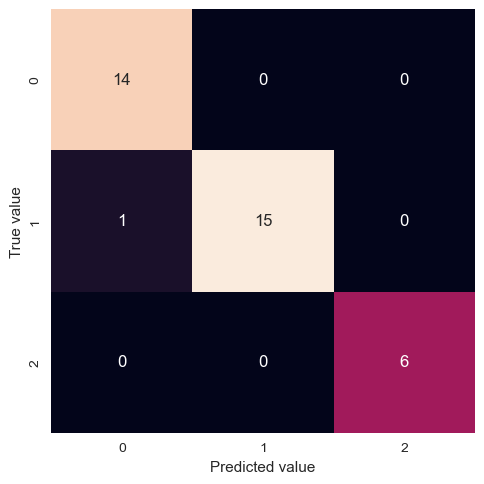

In [101]:
# TO DO: Implement best model
# The decision tree classifier gave the best results 
from sklearn.metrics import confusion_matrix
mat = confusion_matrix(y_test, DT_model.predict(X_test))


In [ ]:
# TO DO: Print confusion matrix using a heatmap
sns.heatmap(mat, square=True, annot=True, cbar=False)
plt.xlabel('Predicted value')
plt.ylabel('True value')

In [105]:
# TO DO: Print classification report
from sklearn.metrics import classification_report
print(classification_report(y_test, DT_model.predict(X_test)))
print(classification_report(y_test, SVC_model.predict(X_test)))


              precision    recall  f1-score   support

           1       0.93      1.00      0.97        14
           2       1.00      0.94      0.97        16
           3       1.00      1.00      1.00         6

    accuracy                           0.97        36
   macro avg       0.98      0.98      0.98        36
weighted avg       0.97      0.97      0.97        36

              precision    recall  f1-score   support

           1       1.00      0.93      0.96        14
           2       0.80      0.75      0.77        16
           3       0.38      0.50      0.43         6

    accuracy                           0.78        36
   macro avg       0.72      0.73      0.72        36
weighted avg       0.81      0.78      0.79        36



### Questions (6 marks)
1. How do the training and validation accuracy change depending on the method used? Explain with values.
1. What are two reasons why the support vector machines model did not work as well as the tree-based model?
1. How many samples were incorrectly classified in step 5.2? 
1. In this case, is maximizing precision or recall more important? Why?

The training and validation accuracy was both lower (0.698, 0.662) respectively for the SVC.
Decision tree is much better at classifcation than SVC because it deals with collinearity better than SVC. Also not enough data for the SVC to make its boundaries. There was only 1 sample that was incorrectly identified.
In this case we would want to maximize recall as we would want a program that correctly identifies all of the acutal postives vs measuing a program on how well it scored when it said it was correct.


### Process Description (4 marks)
Please describe the process you used to create your code. Cite any websites or generative AI tools used. You can use the following questions as guidance:
1. Where did you source your code?
1. In what order did you complete the steps?
1. If you used generative AI, what prompts did you use? Did you need to modify the code at all? Why or why not?
1. Did you have any challenges? If yes, what were they? If not, what helped you to be successful?

1. Source of the code was through labs
2. Completed the steps from top to bottom
3. None
4. No challenges with this lab as it was fairly straight forward.

## Part 3: Observations/Interpretation (3 marks)

Describe any pattern you see in the results. Relate your findings to what we discussed during lectures. Include data to justify your findings.


Noticed the SVC model did not do nearly as well as the decision tree. ~69% accuracy vs almost 100% accurary with the decision tree. As mentioned in class, SVC's are not as good as decision trees for classification.

## Part 4: Reflection (2 marks)
Include a sentence or two about:
- what you liked or disliked,
- found interesting, confusing, challangeing, motivating
while working on this assignment.


Enjoyed that we got to code the machine learning models that was discussed in class. Motitvated to do my own machine learning projects with the new tool sets that were practiced in this assignment.

## Part 5: Bonus Question (3 marks)

Repeat Part 2 and compare the support vector machines model used to `LinearSVC(max_iter=5000)`. Does using `LinearSVC` improve the results? Why or why not?

Is `LinearSVC` a good fit for this dataset? Why or why not?

In [112]:
# TO DO: ADD YOUR CODE HERE
from sklearn.svm import LinearSVC
import warnings
warnings.filterwarnings('ignore')

lsvc = LinearSVC(max_iter=5000)
lsvc.fit(X_train, y_train)
res = cross_validate(lsvc, X_train, y_train, cv=5,scoring='accuracy', return_train_score=True)
lsvc_train = res["train_score"].mean()
lsvc_test = res["test_score"].mean()
results = pd.DataFrame({
"Training": lsvc_train,
"Validation": lsvc_test
}, index=['SVC'])
print(results)


     Training  Validation
SVC  0.898028     0.87266


The LSV with 500 iterations was better than the SVC that was done in the part  before. However, the decision tree is still the best. When compared to descions tree, SVC is not a good fit.

In [111]:
## The LSV with 500 iterations was better than the SVC that was done in the part  before. However, the decision tree is still the best 